# 因果フォレスト（Causal Forests）をPythonで実践的に学ぶ（その１） 因果フォレストとは？ 概念と基本理論

url: https://www.salesanalytics.co.jp/datascience/datascience185/

    現代のデータサイエンスの中で、「何が原因で何が結果か？」という問いに答えるための技術が日々進化しています。

    この中で、因果推論のフィールドは特に注目を浴びており、データから真の因果関係をどうにか明らかにしようという手法として因果フォレストが登場しました。

    とは言え、どこまでデータサイエンス技術が進化してもデータだけから真の因果関係を特定することは困難を極めるとは思います。

    因果フォレストという名前から、何やらランダムフォレストと関係がありそうです。

    伝統的なランダムフォレストとは一線を画すこの新たなアプローチは、どのような背景から生まれ、どのような特性を持つのでしょうか？

    今回は、因果フォレストの基本概念から理論的背景までを解説し、その魅力と可能性を探ります。

## はじめに
    近年、データ解析の中で最も魅力的で挑戦的なテーマの一つとして「因果関係」が浮上してきました。

    多くの研究者や実務家は、単にデータ内の相関関係を見つけるだけでなく、真の「原因と結果」の関係性を明らかにすることの重要性を認識しています。
    この背景のもと、機械学習と統計学が交差する領域で新たな手法が生まれています。

    本記事の目的は、この新たな手法の一つである「因果フォレスト」に焦点を当て、その基本的な概念と理論的背景を解説することです。

    読者の皆様には、因果フォレストがどのような問題解決のために生まれたのか、そして伝統的なランダムフォレストとはどのように異なるのか、といった点に
    ついて深く理解していただきたいと考えています。

    この探求を通じて、データから因果関係を推定するための新しい視点やツールを提供できれば幸いです。因果フォレストの魅力的な世界へ、一緒に旅を始めましょう。

    とは言え、どこまでデータサイエンス技術が進化してもデータだけから真の因果関係を特定することは難しいことも、心にとめて頂ければと思います。

## 因果推論の基礎
### 因果推論とは何か

    因果推論は、ある事象や行動（原因）が別の事象や結果（効果）にどのように影響を与えるかを明らかにするための研究領域です。

    一般的に、「Aが起きたのでBが起こった」という関係性を理解し、定量化することを目的としています。
    この関係性は、単なる相関関係ではなく、Aの変化がBの変化を直接引き起こすという「因果的な関連性」を意味します。

    例を挙げると、医薬品の臨床試験では、新しい薬が病気の回復を促進するかどうかを確認するために、薬の投与と回復の間の因果関係を評価します。

    ここで、他の要因（例えば、患者の生活習慣や遺伝的背景）が回復に影響を与える可能性があるため、これらの要因を考慮に入れながら、薬の効果だけを正確に評価することが必要です。

## 因果推論の重要性とその応用例
    因果推論の重要性は、現代の多くの領域で明らかになっています。

    以下はその応用例の一部です。

    ビジネス：マーケティングキャンペーンの効果を評価する際、キャンペーンが実際に売上げ増加の主要な原因であったかどうかを知ることが重要です。

    医学：前述のように、新しい治療法や薬の効果を評価するために因果関係の確立が必要です。

    公共政策：新しい政策や制度が導入された場合、その政策が目的とする結果をもたらしているか、またどの程度の影響があるかを評価するために因果推論が使用されます。

    経済学：経済政策の変更や市場の変動が経済に及ぼす影響を評価する際に、因果関係の分析が行われます。

    これらの例からもわかるように、因果推論は単に事象の関連性を理解するだけでなく、実際の影響を評価し、将来の意思決定に役立てるための鍵となる手法です。

## ルービンの因果モデル
    ルービンの因果モデル、または潜在的結果フレームワーク（Potential Outcomes Framework）とは、因果推論の基本的なフレームワークであり、
    統計学者Donald Rubinによって1970年代に詳細に整理・紹介されました。

    このモデルは、観察データや実験データからの因果効果を推定するための概念的な基盤を提供しています。

    因果フォレストはルービンの因果モデルの枠組みの中の手法です。ということで、幾つかのルービンの因果モデルの主要な概念について説明します。

## 潜在的結果（Potential Outcomes）
    各個体 i に対して、治療 T を受けた場合の潜在的結果 Yi(1) と、治療を受けなかった場合の潜在的結果 Yi(0) が存在すると仮定します。

    しかし、ある個体は治療を受けるか受けないかのどちらか一方の状態のみを観測できるため、両方の潜在的結果を同時に知ることはできません。

## 因果効果
    個体 i に対する因果効果は、 Yi(1)−Y i(0) として定義されます。

    これは治療を受けた場合と受けなかった場合の潜在的結果の差を表します。

## 平均的な治療効果（Average Treatment Effect: ATE）
    ATEは、全ての個体にわたる因果効果の平均として定義されます。
    
    すなわち、 ATE=E[Y(1)−Y(0)] です。

## 前提
    SUTVA (Stable Unit Treatment Value Assumption):
    各個体の治療効果は他の個体の治療割り当てに影響されないという仮定です。

    無視可能性（Ignorability）:
    交絡因子がすべて観測されていれば、治療の割り当てはそれに独立しているという仮定です。

    交絡の問題:
    交絡因子が存在すると、治療の割り当てと結果との間に関連が生じ、因果関係の推定が難しくなります。

    ルービンの因果モデルは、因果効果を推定するための多くの手法（例: 回帰、マッチング、傾向スコア法など）の基盤として広く用いられています。
    このモデルは、因果関係の概念を明確にし、その推定のための統計的手法を導入する際の指針として機能します。



## 伝統的なランダムフォレストの概要
### ランダムフォレストの基本的な仕組み
    ランダムフォレストは、機械学習のアルゴリズムの一つで、多数の決定木を組み合わせることで、より高い予測精度と汎化性能を持つモデルを作成します。

    具体的な仕組みは以下の通りです。

    Step1: データの準備：目的変数（予測の対象となる変数）と説明変数（特徴量）で構成されるデータセットを準備します。

    Step2: ブートストラップサンプリング：学習データからランダムにサンプルを選択（復元抽出）し、複数のサブセットを生成します。

    Step3: サブセットでの決定木の構築：各サブセットに対して決定木を構築します。この際、ノードでの分割を決定する特徴は、全ての特徴の中からランダムに選ばれた一部のみを使用します。

    Step4: 予測：新しいデータポイントに対する予測は、全ての決定木の予測の平均（回帰の場合）または多数決（分類の場合）によって行われます。

    この手法により、個々の決定木の過学習を防ぎつつ、全体としてのモデルの精度を向上させることができます。



## ランダムフォレストの主な用途
    ランダムフォレストはその高い予測精度と汎用性から、様々な領域での応用が見られます。

    分類問題：目的変数がカテゴリカルなデータの分類を行うために使用されます。例えば、スパムメールの検出や疾患の診断など。

    回帰問題：連続値を持つ目的変数の予測を行うために使用されます。例として、不動産の価格予測や株価の予測など。

    特徴重要度の評価：ランダムフォレストは、各特徴がモデルの予測にどれだけ貢献しているかを評価する能力も持っています。これにより、データ内の重要な特徴を特定することができます。

    欠損値の補完：ランダムフォレストを利用して、データ内の欠損値を予測し、補完することも可能です。

    このように、ランダムフォレストは多岐にわたる問題に対して効果的に使用されており、その実用性の高さから、多くの業界で重宝されています。



## 因果フォレストの誕生
### なぜ因果フォレストが必要なのか
    ランダムフォレストは予測の精度と汎用性に優れていますが、その主要な目的は「予測」です。つまり、与えられた入力データに対して最も確からしい出力を予測することに特化しています。

    しかし、ビジネスや研究の多くのシーンでは、単なる予測を超えて「何が何の結果を生むのか」という因果関係を理解することが求められます。

    例えば、ある広告キャンペーンが売上にどれだけの影響を与えたのか、新しい政策が社会にどのような変化をもたらしたのかといった情報は、単なる予測だけでは得られない情報です。

    このような因果関係を推定するために、伝統的なランダムフォレストのアプローチを拡張したのが因果フォレストです。



## 因果フォレストの主な目的と利点
    因果フォレストの主な目的は、特定の介入や治療が結果にどれだけの影響を与えるかを定量的に評価することです。

    具体的には、あるグループに介入を行い、別のグループには行わないという実験設計の下で、両グループの結果の差（介入の効果）を推定します。

    他の因果推論の手法に比べたとき、因果フォレストの主な利点は以下の通りです。

    高い精度：ランダムフォレストのアンサンブル手法を活用することで、因果効果の推定も高い精度で行うことが可能です。

    柔軟性：様々なデータ構造や実験設計に適応可能であり、特に不均衡なデータセットにおいても効果的に因果効果を推定できます。

    変数の交互作用の捉えやすさ：因果フォレストは、変数間の複雑な交互作用も自動的に捉えることができます。

## ルービンの因果推論との関係性
    因果フォレストはルービンの因果モデルを基盤としており、そのフレームワーク内で動作する手法の一つと言えます。

    そして、因果フォレストはランダムフォレストという機械学習の手法を取り入れることで、複雑なデータ状況下での因果効果の推定に特化しています。

    ルービンの因果モデルは、平均的な治療効果（ATE: Average Treatment Effect）や特定のサブグループでの治療効果（CATE: Conditional Average Treatment Effect）などを推定するための一般的なフレームワークです。

    因果フォレストは、このルービンの因果モデルの特にCATEを高次元のデータや非線形の効果を持つ状況で効率的に推定するための手法です。



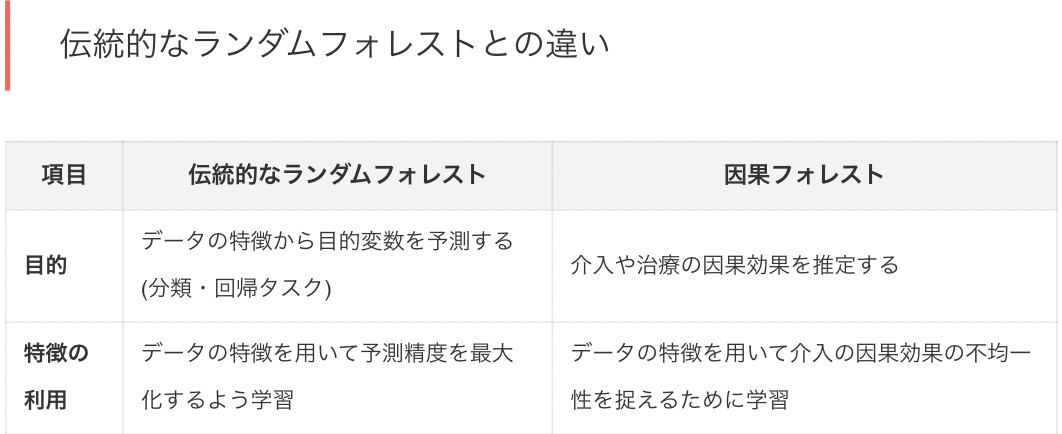

## 因果フォレストの基本的な仕組み
### モデルの構築手順
    因果フォレストのモデル構築は、伝統的なランダムフォレストのアプローチに似ていますが、特定の介入の効果を推定するためのいくつかの独自のステップが含まれています。

    Step1　データの準備：観察データから介入変数（例: テストとコントロール）、結果変数、および他の説明変数を設定します。

    Step2　ブートストラップサンプリング：データセットからランダムにサンプルを選択して複数のサブセットを生成します。

    Step3　サブセットでの決定木の構築：各サブセットにおいて、因果効果を最大化するように分割を行いながら決定木を構築します。

    Step4　因果効果の推定：すべての決定木から得られる因果効果の推定値を組み合わせて、最終的な因果効果の推定を行います。

## アルゴリズムに組み込まれた独自要素
    因果フォレストのアルゴリズムは、伝統的なランダムフォレストのアルゴリズムをベースとしていますが、以下の独自の要素が組み込まれています。

    分割基準の変更：決定木のノードでの分割は、因果効果の不均一性を最大化するように調整されます。
    これにより、特定のサブグループにおける介入の効果をより正確に捉えることができます。

    正規化とバイアスの削減：伝統的なランダムフォレストとは異なり、因果フォレストは介入の効果を推定する際のバイアスを最小化するための正規化手法を採用しています。



## 今後の展望
    因果フォレストは、その独特の特性と強力な因果効果の推定能力により、多くの研究者や実務家から注目を受けています。

    その発展の可能性は以下のように期待されています。

    より高度なアルゴリズム: 現在の因果フォレストのアルゴリズムは非常に高度ですが、さらなる最適化や改良が行われることで、より正確で効率的な因果効果の推定が可能となるでしょう。

    複数介入の因果効果の推定: 複数の介入や治療が同時に行われる複雑なシナリオにおいても、その因果効果を正確に推定する手法の開発が期待されます。

    応用領域の拡大: 既に多岐にわたる分野での応用が進んでいますが、特に医療、経済学、ビジネスの戦略策定などの領域でのさらなる応用が期待されます。

    最後に、因果フォレストは単なるアルゴリズムや手法に留まらず、データから因果関係を明らかにするための強力なツールとして、今後もその発展と応用が楽しみです。



## まとめ
    因果フォレストは、伝統的なランダムフォレストの強力な予測能力をベースに、因果関係の推定に特化した革新的な手法として注目を浴びています。
    この記事を通じて、因果推論の基礎、ランダムフォレストの基本的な仕組み、そして因果フォレストの必要性や特性、その基本的な仕組みなどを解説しました。

    伝統的なランダムフォレストと因果フォレストの間の違いを理解することで、データからの予測を超えて、
    実際の因果関係を明らかにするための新しい視点やツールの重要性をなんとなく理解できたのではないかと思います。

    因果フォレストは、その独自性と高い因果効果の推定能力により、今後さらなる発展と応用が期待される分野となっています。
    これは、データサイエンスが新たなフロンティアに進出する中での、その一つの重要なステップを示しています。

    次回は、Pythonを用いた因果フォレストの準備をステップバイステップで解説します。
    ライブラリの選択からインストール、そして最初のモデルの構築まで、あなたを確実にガイドします。